In [36]:
import matplotlib.pyplot as plt
import numpy as np
import string
from PIL import Image

In the following code, I would rotate the image 90 degrees and scale the image two times her size


In [ ]:
We would create two transforamtion matricecs. The first one would be the rotation matrix: $$
                \begin{bmatrix}
                cos \Theta & sin \Theta & 0 \\ 
                -sin \Theta & cos \Theta & 0 \\ 
                0 & 0 & 1 
                \end{bmatrix}
            $$
And the second matrix would be the scaling matrix: 
$$
                \begin{bmatrix}
                s & 0  & 0 \\ 
                0  & s  & 0 \\ 
                0 & 0 & 1 
                \end{bmatrix}
            $$

In [46]:
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])
T = T_s @ T_r

In [ ]:
In the next step, we would copy the image into an array, and create a new array to save the transformed image

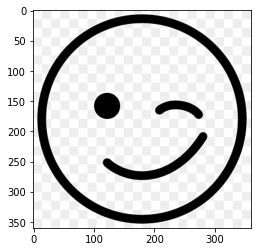

In [47]:
image = Image.open('img.jpeg').convert('RGB')

# Load the image as a matrix
img = np.array(image)
plt.imshow(img)
plt.show()
transformWidth  = img.shape[0] *2
transformWidth  = img.shape[1] *2

img_transformed = np.empty((transformWidth, transformWidth,img.shape[2]), dtype=np.uint8)



The transformation matreix would tarnsform each pixel location, and save the new location in the new array, with the pixel value.

In [49]:
for i, row in enumerate(img):
    for j, col in enumerate(row):
        
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data


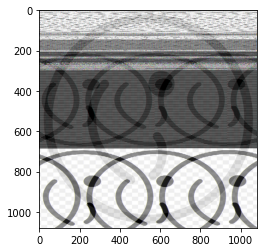

In [50]:
plt.imshow(img_transformed)
plt.show()

Although the image did transform,it did not transformed as expected. The reason is that we scaled the original matrix that repesented the image, and that resulted in gaps.
To solve this, I would place in the "gap" location the original pixel before the transformation. To find it, I would invers that transformation matrix, and would multiply gap coordinates vector with the inverted matrix. 

In [51]:
def nearest_neighbors(i, j, M, T_inv):
    x_max, y_max = M.shape[0] - 1, M.shape[1] - 1
    x, y, _ = T_inv @ np.array([i, j, 1])
    if np.floor(x) == x and np.floor(y) == y:
        x, y = int(x), int(y)
        return M[x, y]
    if np.abs(np.floor(x) - x) < np.abs(np.ceil(x) - x):
        x = int(np.floor(x))
    else:
        x = int(np.ceil(x))
    if np.abs(np.floor(y) - y) < np.abs(np.ceil(y) - y):
        y = int(np.floor(y))
    else:
        y = int(np.ceil(y))
    if x > x_max:
        x = x_max
    if y > y_max:
        y = y_max
    return M[x, y,]

In [52]:
T_inv = np.linalg.inv(T)
img_nn = np.empty((transformWidth, transformWidth,img.shape[2]), dtype=np.uint8)
for i, row in enumerate(img_transformed):
    for j, col in enumerate(row):
        img_nn[i, j, :] = nearest_neighbors(i, j, img, T_inv)


In [1]:
plt.figure(figsize=(5, 5))
plt.imshow(img_nn)
plt.show()

NameError: name 'plt' is not defined

## Linear Algebra Concepts
The conecpt that have been used here were:
1. Change of basis: In order to see the picture in sepia filter, I change the pixal basis to the basis of the sepia matrix.
2. Invertible change of basis matrix: to find the "missing pixels" after the scaling, I use the inverted matrix.
3. Linear Transformation: I did the change of basis via linear transformation.
4. Matrix Multiplication: In order to do the transformation, I had to do matrix multiplcation between the matrix and the vector.